In [18]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [79]:
Vbase = 400/np.sqrt(3)
Sbase = 1000
Ibase = Sbase/Vbase
Zbase = Vbase/Ibase
Rbase = Vbase/Ibase
Lbase = Zbase/(2*pi*50)
Cbase = 1/(Zbase*2*pi*50)
Vbase = np.sqrt(2)*Vbase
Ibase = np.sqrt(2)*Ibase

#Inverter Variables
w = 2*pi*50
Lf = 4*10**(-3)
Rf = 0.05
Cf= 3*10**(-6)
Rc = 0.05
Lc = 2.4*10**(-3)
Vdc = 2.66
#Load Variables
RLoad = 0.8
XLoad = 0.6

md = 1
mq = 0
Tinv = 0.002
mdq = np.array([md,mq])

In [80]:
class Load:
    def __init__(self):
        self.RLoad = RLoad
        self.XLoad = XLoad
        self.Idq = np.array([0.0,0.0])
        self.Vdq = np.array([0.0,0.0])
        self.change_input(self.Idq)
    
    def change_input(self, Idq):
        self.Id,self.Iq = Idq
        self.Vd = self.Id*RLoad - self.Iq*XLoad
        self.Vq = self.Id*XLoad + self.Iq*RLoad
        #Vcmpx = complex(self.Id,self.Iq)*complex(self.RLoad,self.XLoad)
        
        self.Vdq = np.array([self.Vd, self.Vq])

In [81]:
class Inverter:
    def __init__(self):
        self.state = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

        self.md,self.mq = mdq
        self.Vod = self.Voq = np.array([0,0])
        self.mdq = np.array([self.md,self.mq])
        self.change_state(self.state)
        self.change_input(self.mdq)

    def change_input(self, mdq):
        self.md,self.mq = mdq
        
    
    def change_state(self,x):
        self.Ifd = x[0]
        self.Ifq = x[1]
        self.Vcd = x[2]
        self.Vcq = x[3]
        self.Iod = x[4]
        self.Ioq = x[5]
        self.Vid = x[6]
        self.Viq = x[7]
        self.Idq = np.array([self.Iod,self.Ioq])
        self.state = np.array([self.Ifd,self.Ifq, self.Vcd, self.Vcq, self.Iod, self.Ioq,self.Vid,self.Viq])

    def derivative(self,mdq):
        self.change_input(mdq)
        self.Vod = self.Iod*RLoad - self.Ioq*XLoad
        self.Voq = self.Iod*XLoad + self.Ioq*RLoad
        Vid_dot = (1/Tinv)*(-self.Vid + self.md*Vdc)
        Viq_dot = (1/Tinv)*(-self.Viq + self.mq*Vdc)
        Ifd_dot = (-Rf/Lf)*self.Ifd + w*self.Ifq + (self.Vid - self.Vcd)/Lf
        Ifq_dot = -w*self.Ifd + (-Rf/Lf)*self.Ifq + (self.Viq - self.Vcq)/Lf
        Vcd_dot = w*self.Vcq + (self.Ifd - self.Iod)/Cf
        Vcq_dot = -w*self.Vcd + (self.Ifq - self.Ioq)/Cf
        Iod_dot = (-Rc/Lc)*self.Iod + w*self.Ioq + (self.Vcd - self.Vod)/Lc
        Ioq_dot = -w*self.Iod + (-Rc/Lc)*self.Ioq + (self.Vcq - self.Voq)/Lc

        return np.array([Ifd_dot,Ifq_dot,Vcd_dot,Vcq_dot,Iod_dot,Ioq_dot,Vid_dot,Viq_dot])

In [92]:
t0 = 0
t = 0.2
dt = 0.000001
ts= np.arange(t0,t,dt)

In [93]:
def Machine_in_Grid(Inverter):
    Vd = np.zeros(len(ts))
    Vq = np.zeros(len(ts))
    Id = np.zeros(len(ts))
    Iq = np.zeros(len(ts))
    for i,t in enumerate(ts):
        Inverter.change_state(Inverter.state + Inverter.derivative(mdq)*dt)
        
        
        Vd[i] = Inverter.Vod
        Vq[i] = Inverter.Voq
        Id[i] = Inverter.Iod
        Iq[i] = Inverter.Ioq
        

    return [Vd,Vq,Id,Iq]
        

In [94]:

inverter = Inverter()

In [95]:
Vd,Vq,Id,Iq= Machine_in_Grid(inverter)

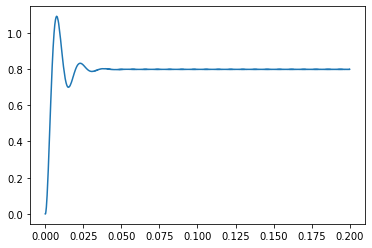

In [96]:
plt.plot(ts,np.sqrt(Vd**2,Vq**2))

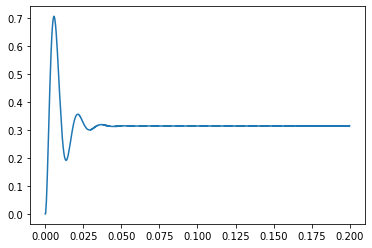

In [97]:
plt.plot(ts,np.sqrt(Id**2,Iq**2))

In [14]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

In [144]:
Vbase = 400/np.sqrt(3)
Sbase = 1000
Ibase = Sbase/Vbase
Zbase = Vbase/Ibase
Rbase = Vbase/Ibase
Lbase = Zbase/(2*pi*50)
Cbase = 1/(Zbase*2*pi*50)
Vbase = np.sqrt(2)*Vbase
Ibase = np.sqrt(2)*Ibase

#Inverter Variables
w = 2*pi*50
Lf = 4*10**(-3)
Rf = 0.05
Cf= 3*10**(-6)
Rc = 0.05
Lc = 2.4*10**(-3)
Vdc = 1
#Load Variables
RLoad = 0.8
XLoad = 0.6

T_inv = 0.002


#Machine Variables
xd =1.56
xdd=0.296
xq =2
xqd=0.4
Td0=3.7;
Tq0=0.6;
J=40;
D=0.2;
Rsg=0.00;
Ka=24;
Ta=0.05;
Tsv=0.05;
Tch=0.5;
Rd=0.005;
Pref=1.0;
Vref=1.15;

In [145]:
def Inverter(t,x):
    Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vid,Viq,Eqd,Edd,delta,d_w,Efd,Psv,Pm = x
    Vod = Iod*RLoad - Ioq*XLoad
    Voq = Iod*XLoad + Ioq*RLoad
    md = (Edd - Ioq*xqd - Iod*Rsg)
    mq = (Eqd - Ioq*Rsg + Iod*xdd)
    Vid_dot = (1/T_inv)*(-Vid + md*Vdc)
    Viq_dot = (1/T_inv)*(-Viq + mq*Vdc)
    Ifd_dot = (-Rf/Lf)*Ifd + w*Ifq + (Vid - Vcd)/Lf
    Ifq_dot = -w*Ifd + (-Rf/Lf)*Ifq + (Viq - Vcq)/Lf
    Vcd_dot = w*Vcq + (Ifd - Iod)/Cf
    Vcq_dot = -w*Vcd + (Ifq - Ioq)/Cf
    Iod_dot = (-Rc/Lc)*Iod + w*Ioq + (Vcd - Vod)/Lc
    Ioq_dot = -w*Iod + (-Rc/Lc)*Ioq + (Vcq - Voq)/Lc

    ##Machine Equations
    Eqd_dot = (-Eqd - (xd-xdd)*Iod + Efd)/Td0 
    Edd_dot = (-Edd + (xq-xqd)*Ioq)/Tq0 
    del_dot =  d_w
    d_w_dot = (Pm - (Eqd*Ioq + Edd*Iod - (xdd-xqd)*(Iod)*(Ioq)) + D*(d_w))/J 
    Efd_dot = (-Efd +  Ka*(Vref - np.sqrt(Vod**2 + Voq**2)))/Ta
    Psv_dot = (-Psv + Pref - (d_w)/Rd)/Tsv 
    Pm_dot =  (-Pm + Psv)/Tch 
    
    return np.array([Ifd_dot,Ifq_dot,Vcd_dot,Vcq_dot,Iod_dot,Ioq_dot,Vid_dot,Viq_dot,Eqd_dot,Edd_dot,del_dot,d_w_dot,Efd_dot,Psv_dot,Pm_dot])

In [146]:
t0 = 0
t = 5
dt = 0.0001
t_eval = np.arange(t0,t,dt)
x0 = np.array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],])

In [147]:
sol = solve_ivp(Inverter,[t0,t],y0 = x0.ravel(),t_eval = t_eval)

In [148]:
Ifd,Ifq,Vcd,Vcq,Iod,Ioq,Vid,Viq,Eqd,Edd,delta,d_w,Efd,Psv,Pm  = sol.y
t = sol.t

In [149]:
Vod = Iod*RLoad - Ioq*XLoad
Voq = Iod*XLoad + Ioq*RLoad

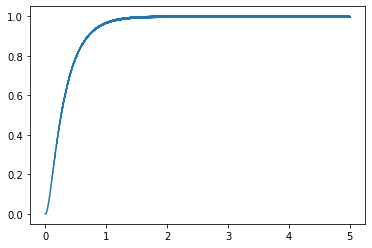

In [150]:
plt.plot(t,np.sqrt(Iod**2 + Ioq**2))

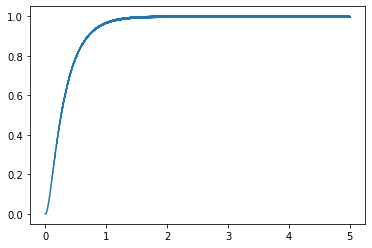

In [151]:
plt.plot(t,np.sqrt(Vod**2 + Voq**2))

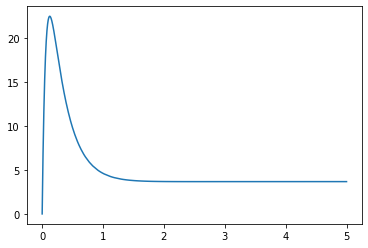

In [152]:
plt.plot(t,Efd)

In [142]:
np.sqrt(Vod**2 + Voq**2)

array([0.00000000e+00, 4.31681682e-12, 4.98915877e-08, ...,
       9.99269963e-01, 9.96660297e-01, 9.94364636e-01])

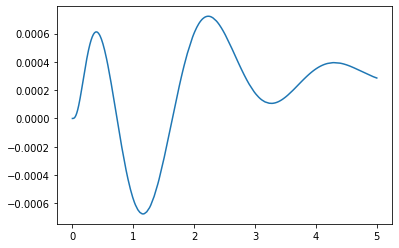

In [153]:
plt.plot(t,d_w)

In [107]:
np.sqrt(3/2)

1.224744871391589

In [109]:
2*np.sqrt(3)/pi

1.1026577908435842

In [111]:
pi/2

1.5707963267948966